# Exploratory Data Analysis: Crypto, Equities, and Gold
**Jordan Abbit**  
DAT 490 Capstone Project  
September 2025

---

## 1. Data Sources, Preparation, and Cleaning

For my analysis, I explored datasets that focus on various financial assets, exploring the volatility, correlations, and spillover risks. Through my research, I'm looking to understand how these assets behave both individually and in relation to one another, particularly during periods of stress. The cryptocurrency data used in this project was downloaded directly from the exchange platform Kraken.com. I focused primarily on Bitcoin (BTC) and Ethereum (ETH) to represent cryptocurrencies, due to their large market caps, high liquidity, and their role as central assets within the cryptocurrency ecosystem. To clean the OHLCVT (open, high, low, close, volume, trades) data, first I converted the UNIX timestamps into standard Date format. Then, to focus my analysis on relevant historical data, I filtered the dataset to begin on January 1, 2020.

For equities, I used Stooq's data on the S&P 500 (SPX) and the Dow Jones Industrial Average (DJI). These indices provide complimentary views of the United States' equity market. The SPX shows a broad market cap-weighted index of 500 companies, whereas the DJI provides a narrower view of 30 industrial leaders. Both of these indices are reported on with daily OHLCVT data which allows me to analyze them more consistently alongside the crypto datasets.

For gold, which is acting as the control variable, I used a Kaggle dataset that included the daily closing prices from 2015 through 2025. Gold has historically been considered a "safe-haven" asset, making it a valuable comparison to equity and crypto, particularly in times of volatility. I cleaned this dataset by standardizing the column names and entry dates, and filtering the data from 2020 onward. Unlike the equities and crypto datasets, the gold dataset did not include OHLCVT values, so I treated it primarily as a closing price placeholder to try and maintain some consistency.

The merged dataset includes these five asstes, BTC, ETH, SPX, DJI, and Gold. I aligned these by their date using an inner join. This ensured that only days with overlapping trading data were included, preventing mismatches due to weekends and market holidays where the various assets may not correctly align.

Finally, I computed the daily log returns of each series, which can be defined as:

rt = ln(Pt/Pt-1)

where Pt is the daily closing price. These log returns are additive over time, stabilize variance, and allow for better cross-asset comparison. This stage of cleaning and processing helps to establish the foundation for EDA and ensures that all visualizations and statistics are based on consistent and comparable data.

In [ ]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())

Saving cleaned_btc.csv to cleaned_btc.csv
Saving cleaned_dji.csv to cleaned_dji.csv
Saving cleaned_eth.csv to cleaned_eth.csv
Saving cleaned_gold.csv to cleaned_gold.csv
Saving cleaned_spx.csv to cleaned_spx.csv


['cleaned_btc.csv',
 'cleaned_dji.csv',
 'cleaned_eth.csv',
 'cleaned_gold.csv',
 'cleaned_spx.csv']

In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from datetime import datetime
OUT = "expanded_outputs"
FIG = f"{OUT}/figures"
os.makedirs(FIG, exist_ok=True)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 1200)

In [ ]:
paths = {"btc":"cleaned_btc.csv","eth":"cleaned_eth.csv","spx":"cleaned_spx.csv","dji":"cleaned_dji.csv","gold":"cleaned_gold.csv"}
btc  = pd.read_csv(paths["btc"],  parse_dates=["Date"])[["Date","Close"]].rename(columns={"Close":"BTC_Close"})
eth  = pd.read_csv(paths["eth"],  parse_dates=["Date"])[["Date","Close"]].rename(columns={"Close":"ETH_Close"})
spx  = pd.read_csv(paths["spx"],  parse_dates=["Date"])[["Date","Close"]].rename(columns={"Close":"SPX_Close"})
dji  = pd.read_csv(paths["dji"],  parse_dates=["Date"])[["Date","Close"]].rename(columns={"Close":"DJI_Close"})
gold = pd.read_csv(paths["gold"], parse_dates=["Date"])[["Date","Close"]].rename(columns={"Close":"Gold_Close"})
df = (btc.merge(eth, on="Date", how="inner").merge(spx, on="Date", how="inner").merge(dji, on="Date", how="inner").merge(gold, on="Date", how="inner").sort_values("Date").reset_index(drop=True))
for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]:
    df[f"{c}_Return"] = np.log(df[c] / df[c].shift(1))
ret = df.dropna().copy()
os.makedirs(OUT, exist_ok=True)
df.to_csv(f"{OUT}/merged_prices.csv", index=False)
ret.to_csv(f"{OUT}/merged_returns.csv", index=False)
print("Saved merged datasets to", OUT)
df.head(10)

Saved merged datasets to expanded_outputs


,Date,BTC_Close,ETH_Close,SPX_Close,DJI_Close,Gold_Close,BTC_Close_Return,ETH_Close_Return,SPX_Close_Return,DJI_Close_Return,Gold_Close_Return
0,2020-01-02,6942.3,126.72,3257.85,28868.80,1.122083,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,7334.8,134.00,3234.85,28634.88,1.117144,0.054997,0.055860,-0.007085,-0.008136,-0.004411
2,2020-01-06,7757.3,144.34,3246.28,28703.38,1.116196,0.056004,0.074332,0.003527,0.002389,-0.000849
3,2020-01-07,8160.0,143.20,3237.18,28583.68,1.119799,0.050610,-0.007929,-0.002807,-0.004179,0.003223
4,2020-01-08,8043.3,140.70,3253.05,28745.09,1.115474,-0.014405,-0.017612,0.004890,0.005631,-0.003870
5,2020-01-09,7818.0,137.91,3274.70,28956.90,1.111321,-0.028411,-0.020029,0.006633,0.007342,-0.003730
6,2020-01-10,8191.9,144.92,3265.35,28823.77,1.111111,0.046717,0.049581,-0.002859,-0.004608,-0.000189
7,2020-01-13,8104.0,143.58,3288.13,28907.05,1.111667,-0.010788,-0.009289,0.006952,0.002885,0.000500
8,2020-01-14,8815.5,166.19,3283.15,28939.67,1.113573,0.084154,0.146239,-0.001516,0.001128,0.001713
9,2020-01-15,8810.3,166.31,3289.29,29030.22,1.113090,-0.000590,0.000722,0.001868,0.003124,-0.000434


## 2. Exploratory Data Analysis

---

## 2.1 Normalized Price Index

To get a better comparison between the various assets, I normalized them all to start at 100 on January 1st, 2020. This made it easier to see how each one moved over time without having to worry about their actual dollar prices.

At the start of 2020, right when COVID hit, all of the markets dropped. Stocks fell hard, with the S&P 500 and Dow both losing around a third of their value in just a few weeks. Bitcoin and Ethereum also took a big hit, with prices cut almost in half. Gold dipped too, but not nearly as much, and it bounced back fairly quickly compared to the others.

After that initial crash, the trends separated quite a bit. Crypto prices didn’t just recover, they skyrocketed. From mid-2020 through the second quarter of 2021, Bitcoin climbed from under \$10,000 to nearly \$65,000, while Ethereum went from around \$200 to over \$4,000. Stocks recovered too, but their growth was more steady and moderate compared to the massive swings that crypto experienced. Gold peaked around the middle of 2020 and then leveled off.

In 2022, the market shifted again. Inflation and interest rate hikes hit financial markets across the board. Stocks went into a bear market, but crypto fell even harder. Bitcoin dropped below \$20,000, and at one point Ethereum dipped under \$1,000. These crashes were worsened by crypto-specific events, like the FTX bankruptcy. Gold, on the other hand, stayed relatively stable during that time, moving sideways while the others were tanking.

Starting in 2023 and continuing into 2024, things started to settle. Crypto continued to present as more volatile than stocks or gold, but the extreme movement became progressively less common. Stock equities managed to rebound some of their 2022 losses, while gold continued to act as a safer, lower-volatility asset.

Looking at the normalized price chart overall, it’s clear that crypto exaggerates whatever cycle the broader market is in. When liquidity is strong and risk appetite is high, Bitcoin and Ethereum soar much higher than stocks. When conditions tighten or panic hits, they crash harder too. Stocks follow the macro environment more closely, while gold tends to play the role of a stabilizer in the background.

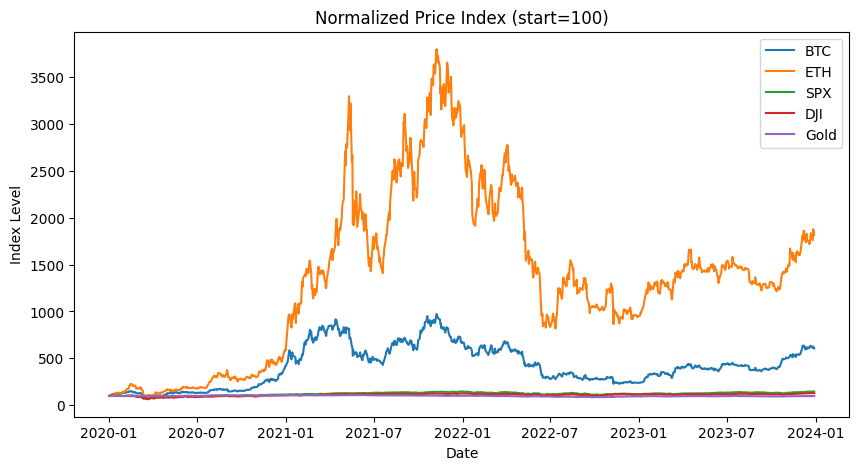

In [ ]:
def savefig(p): plt.tight_layout(); plt.savefig(p, bbox_inches="tight", dpi=140); plt.close()
idx = df[["Date","BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]].copy()
for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]:
    idx[c] = (idx[c] / idx[c].iloc[0]) * 100.0
plt.figure(figsize=(10,5))
for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]:
    plt.plot(idx["Date"], idx[c], label=c.replace("_Close",""))
plt.title("Normalized Price Index (start=100)"); plt.xlabel("Date"); plt.ylabel("Index Level"); plt.legend()
plt.show(); savefig(f"{FIG}/01_normalized_prices.png")

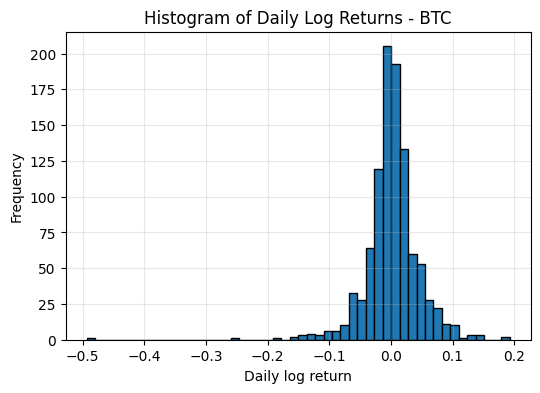

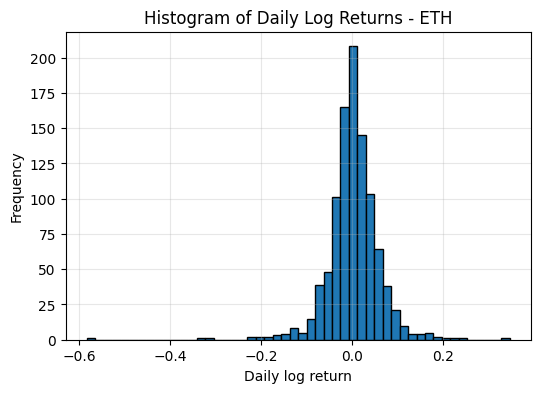

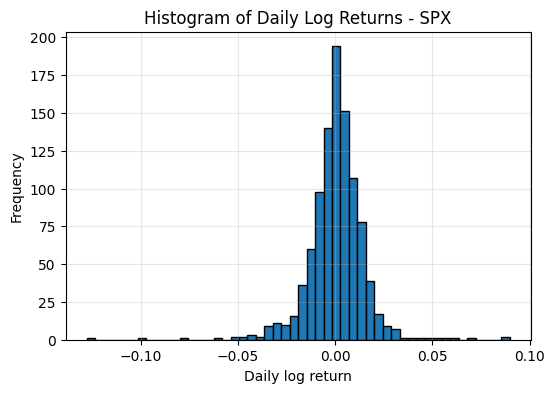

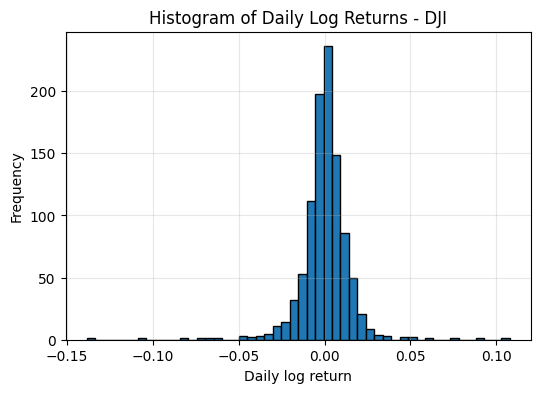

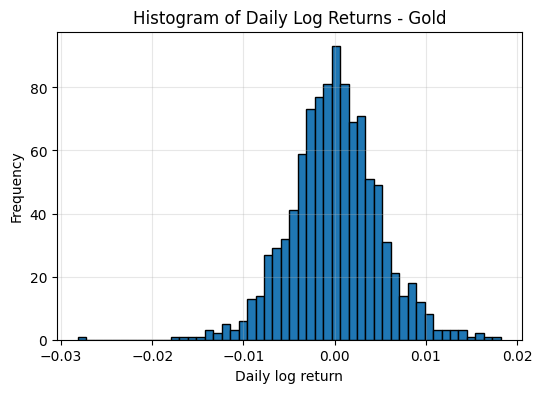

In [ ]:
asset_list = ["BTC_Close", "ETH_Close", "SPX_Close", "DJI_Close", "Gold_Close"]

for col in asset_list:
    returns = ret[f"{col}_Return"].dropna()

    plt.figure(figsize=(6,4))
    plt.hist(returns, bins=50, edgecolor="black")
    plt.title(f"Histogram of Daily Log Returns - {col.replace('_Close','')}")
    plt.xlabel("Daily log return")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.show()


## 2.2 Return Distributions

After normalizing the price levels, I looked at the distributions of daily returns for each asset. To do this I plotted histograms for Bitcoin, Ethereum, the S&P 500, the Dow, and gold. I also made a boxplot to compare them all side by side.

The results aren’t surprising, but they’re still worth looking at closely. Both Bitcoin and Ethereum have very wide distributions, with “fat tails” that show how often extreme moves happen. It’s not unusual to see crypto move 10–15% in a single day, especially during the bull run in 2021 or the crashes in 2020 and 2022. The stock indices rarely come anywhere near that. Most of the daily moves for the S&P and Dow are under 3%. Gold is even calmer, with daily changes usually clustering tightly around zero.

The boxplot makes this difference obvious at a glance. The boxes for BTC and ETH are much taller, and their whiskers stretch way farther than the equities or gold. There are also a lot more outliers for crypto, which represent those extreme daily swings. In comparison, the boxes for the S&P and Dow are short and tight, and gold barely shows much variation at all.

Looking at the statistics backs this up. Crypto returns showed high kurtosis, meaning the tails of their distributions are heavier, so larger moves are more common. They also tend to be negatively skewed, meaning the downward shocks are bigger or more frequent than the equally large upward jumps. On the other hand, stocks and gold had return distributions that looked closer to normal. There is still the occasional extreme day, but nothing like the constant turbulence seen in BTC and ETH.

The practical takeaway here is straightforward: if you hold crypto, you’re signing up for way more risk than with traditional assets. The payoff can be huge, but the chance of big daily losses is also much higher. Equities, by comparison, offer more stable returns, and gold is the steadiest of them all.

/tmp/ipython-input-1181526899.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["BTC","ETH","SPX","DJI","Gold"], showfliers=True)


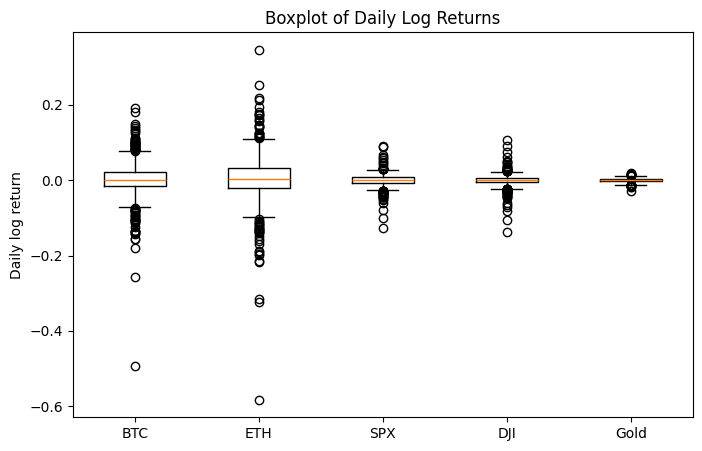

In [ ]:
plt.figure(figsize=(8,5))
data = [ret[f"{c}_Return"].dropna().values for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]]
plt.boxplot(data, labels=["BTC","ETH","SPX","DJI","Gold"], showfliers=True)
plt.title("Boxplot of Daily Log Returns"); plt.ylabel("Daily log return")
plt.show(); savefig(f"{FIG}/02_boxplot_returns.png")

## 2.3 Correlation Heatmap

The next step I took was checking how these assets move together by building a correlation matrix of their daily returns and then plotting it as a heatmap. This lets me see, at a glance, which markets are most related to each other.

The results lined up with what I expected. Bitcoin and Ethereum move closely together, with their correlation coming out way higher than with any of the other assets. That makes sense since they’re both in the same crypto market and usually respond to the same types of news or changes in investor sentiment.

When I looked at crypto compared to stocks, the correlations came out much lower. Bitcoin and Ethereum only showed small positive correlations with the S&P 500 and the Dow, usually around 0.1 to 0.3. That tells me there’s some connection, but not nearly enough to say that they reliably move together. Gold lined up even less with crypto, with correlations that were basically zero most of the time.

The strongest correlation overall was between the S&P 500 and the Dow, which was very high (close to 1). That’s expected because they’re both measuring large U.S. stocks, just in slightly different ways. Gold, on the other hand, barely lined up with either crypto or equities, showing that it tends to follow its own path.

Looking at the big picture, this suggests that adding crypto to a traditional stock portfolio could, in theory, provide some diversification, since the correlations are low. But there’s a catch. Correlations aren’t constant, they can change during stressful periods. In fact, when I dug into rolling correlations later on, I found that crypto and stocks do move more closely together during crises, like the COVID crash or the 2022 sell-off. That means the diversification benefits disappear right when investors would need them most.

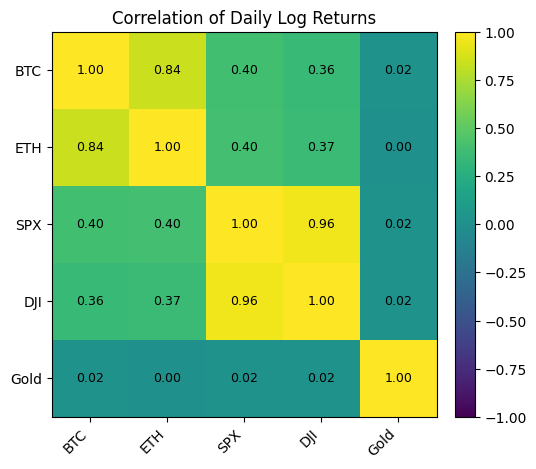

In [ ]:
labels = ["BTC","ETH","SPX","DJI","Gold"]
cm = ret[[f"{c}_Return" for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]]].corr().values
fig, ax = plt.subplots(figsize=(6,5)); im = ax.imshow(cm, vmin=-1, vmax=1)
ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_yticks(range(len(labels))); ax.set_yticklabels(labels)
ax.set_title("Correlation of Daily Log Returns"); fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f"{cm[i,j]:.2f}", ha="center", va="center", fontsize=9)
plt.show(); savefig(f"{FIG}/03_corr_heatmap.png")

## 2.4 Rolling 30-day Volatility

After looking at returns and correlations, I wanted to see how volatility changed over time. To do this, I calculated rolling 30-day standard deviations of daily returns for each asset and plotted them together. This gives a moving snapshot of how “bumpy” each market was from month to month.

The chart shows a few obvious spikes. The first one happened in March 2020, right at the start of the COVID crash. Stocks, crypto, and even gold all saw their volatility jump at the same time. But the difference in magnitude stood out, Bitcoin and Ethereum’s volatility went through the roof, while equities, though volatile, never came close to that level. Gold moved the least, spiking just a little before flattening back out.

Another noticeable spike showed up in 2021 during the big crypto bull run. What stood out about this one is that it wasn’t caused by a crash, it came from rapid gains. Ethereum in particular had some huge swings while it was pushing up to new record highs. Stocks, on the other hand, stayed relatively steady and just kept climbing at a slower, more consistent pace.

Then in 2022, volatility surged again, this time for both crypto and equities. Inflation, rate hikes, and a general risk-off environment hit everyone. For crypto, the Terra/Luna collapse and the FTX bankruptcy added extra stress. Once again, BTC and ETH saw volatility that was several times higher than stocks or gold. Gold, true to form, stayed the most stable of the group.

Overall, the rolling volatility chart shows that crypto markets don’t just experience more risk on average, they also experience sudden bursts of extreme volatility. These bursts usually show up around major global events. That’s also why a model like GARCH makes sense here, since it’s built to handle volatility that comes in waves. Assuming volatility is flat all the time doesn’t really fit what we see in these markets.

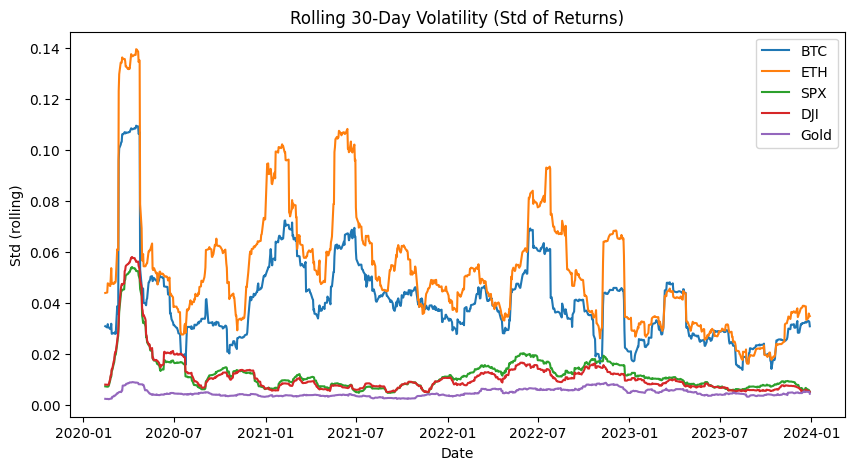

In [ ]:
ROLL = 30
roll = ret[["Date"]].copy()
for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]:
    roll[c.replace("_Close","_RollStd")] = ret[f"{c}_Return"].rolling(ROLL).std()
plt.figure(figsize=(10,5))
for c in [x for x in roll.columns if x.endswith("_RollStd")]:
    plt.plot(ret["Date"], roll[c], label=c.replace("_RollStd",""))
plt.title(f"Rolling {ROLL}-Day Volatility (Std of Returns)"); plt.xlabel("Date"); plt.ylabel("Std (rolling)"); plt.legend()
plt.show(); savefig(f"{FIG}/04_rolling_volatility.png")

## 2.5 Scatter Plots with Linear Fit

To check if there’s any kind of linear relationship between the assets, I made scatter plots of their daily returns. I focused on three pairs: Bitcoin vs. the S&P 500, Ethereum vs. the Dow, and Gold vs. the S&P. For each one, I added a simple regression line and calculated the R² value.

The plots came out pretty scattered, with no clear trend. For both Bitcoin and Ethereum against the stock indices, the dots basically formed a cloud. The regression line didn’t explain much at all, which matched the R² values being very close to zero. That tells me that stock returns don’t really predict crypto returns on a day-to-day basis, and vice versa.

Gold showed the same kind of independence when compared to the S&P 500. Its returns don’t line up with stocks in any obvious way, at least not in a linear sense. The dots were just spread around without any strong slope.

One small detail that stood out is that during crisis periods, like March 2020 or the 2022 sell-off, the points cluster in certain areas. This means there were days when both crypto and equities dropped heavily at the same time. So while the overall relationship is weak, there are pockets of time where they do move together, usually when things are going badly everywhere.

Outside of those stressed periods, the scatter plots show that crypto and gold mostly follow their own paths compared to U.S. stocks. This backs up what is seen in the correlation heatmap: the relationships are weak on average.

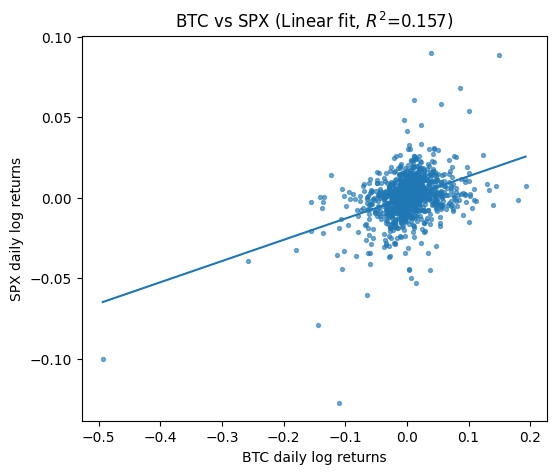

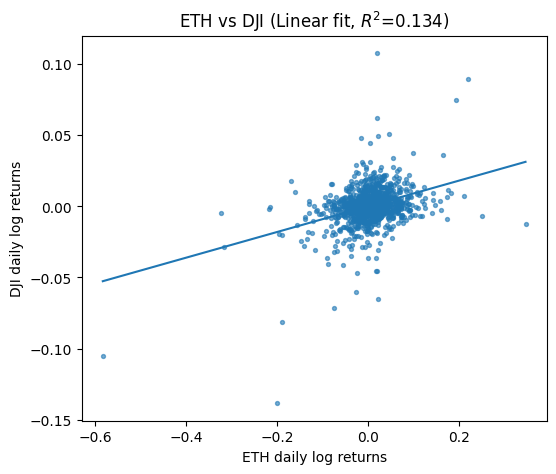

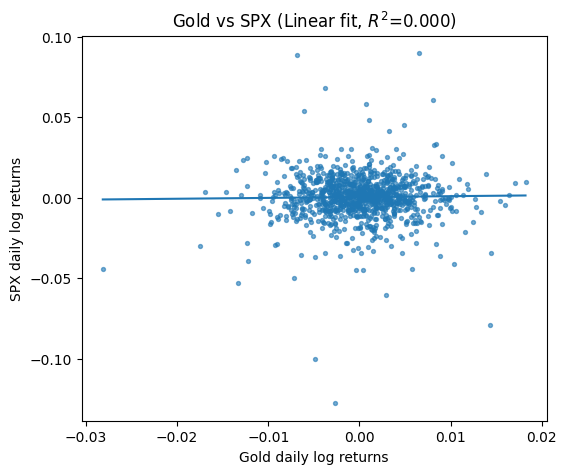

In [ ]:
pairs = [("BTC_Close_Return","SPX_Close_Return"),
         ("ETH_Close_Return","DJI_Close_Return"),
         ("Gold_Close_Return","SPX_Close_Return")]
for xcol, ycol in pairs:
    v = ret[[xcol,ycol]].dropna()
    plt.figure(figsize=(6,5)); plt.scatter(v[xcol], v[ycol], s=8, alpha=0.6)
    if len(v) > 5:
        m, b = np.polyfit(v[xcol], v[ycol], 1)
        xs = np.linspace(v[xcol].min(), v[xcol].max(), 100)
        plt.plot(xs, m*xs + b)
        yhat = m*v[xcol] + b
        ss_res = np.sum((v[ycol]-yhat)**2); ss_tot = np.sum((v[ycol]-v[ycol].mean())**2)
        r2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan
        title = f"{xcol.replace('_Close_Return','')} vs {ycol.replace('_Close_Return','')} (Linear fit, $R^2$={r2:.3f})"
    else:
        title = f"{xcol} vs {ycol}"
    plt.title(title); plt.xlabel(xcol.replace("_Close_Return","")+" daily log returns"); plt.ylabel(ycol.replace("_Close_Return","")+" daily log returns")
    plt.show(); savefig(f"{FIG}/scatter_{xcol.replace('_Close_Return','')}_vs_{ycol.replace('_Close_Return','')}.png")

## 3. Period Analysis

To further explore how these assets behaved, I broke the data into four main periods: 2020, 2021, 2022, and 2023 & beyond. Each of these years had its own market “story,” and the stats look different depending on which slice you’re looking at.

2020 (COVID):
This year started with one of the fastest global market crashes in history. In March, stocks fell more than 30% in just a few weeks. Bitcoin and Ethereum also crashed, dropping close to half their value. Volatility went off the charts across the board, but crypto was especially unstable. The interesting part is how the recovery unfolded. Stocks returned to their previous levels steadily, helped by government stimulus. Gold also climbed, as investors looked for safety. Crypto, on the other hand, not only recovered but increased even higher, setting the stage for the bull market that followed.

2021 (Crypto Bull Market):
This was a year of significant wild gains. Bitcoin shsot up to nearly \$65k, and Ethereum crossed \$4k. Daily swings were huge, it wasn’t uncommon to see double-digit percent moves. Stocks also rose during this time, but their increases looked tame in comparison. Gold, meanwhile, cooled off. It drifted lower or sideways as investors rotated into riskier assets. The numbers from 2021 highlight how crypto can deliver massive upside but at the cost of extreme volatility.

2022 (Broad Sell-Off):
Everything changed in 2022. Inflation was increasing, rates were being hiked aggressively, and risk assets across the board sold off. Stocks went into bear market territory, and crypto collapsed even further. During this period, correlations between crypto and equities actually rose, showing how crises tend to push all risk assets in the same direction. Gold held its steady, trading sideways most of the year, which is exactly what you’d expect from a safe-haven asset.

2023 and beyond :
By 2023 things started to calm. Stocks started to rebound as inflation cooled off and policy expectations shifted. Crypto remained volatile but not at the insane levels of the prior years. There were still swings, but they were more controlled compared to 2020–2022. Gold stayed steady. This period showed that while crypto may settle down for stretches, it’s still far riskier than traditional assets.

Breaking the analysis into these regimes makes the differences clearer. Crypto doesn’t just move more than equities and gold, it amplifies whatever is happening in the broader market. In up cycles it outperforms massively, and in down cycles it crashes harder. Gold, on the other hand, keeps its role as the anchor.

In [ ]:
def stats_for_period(df_in, start, end):
    mask = (df_in["Date"] >= pd.to_datetime(start)) & (df_in["Date"] <= pd.to_datetime(end))
    r = df_in.loc[mask, [f"{c}_Return" for c in ["BTC_Close","ETH_Close","SPX_Close","DJI_Close","Gold_Close"]]].dropna()
    if r.empty:
        return pd.DataFrame(columns=["Series","count","mean","std","min","max","skew","kurtosis"]).assign(Period=f"{start} to {end}")
    s = r.agg(["count","mean","std","min","max","skew","kurtosis"]).T.reset_index().rename(columns={"index":"Series"})
    s["Period"] = f"{start} to {end}"
    return s
periods = [("2020-01-01","2020-12-31"),
           ("2021-01-01","2021-12-31"),
           ("2022-01-01","2022-12-31"),
           ("2023-01-01", datetime.now().strftime("%Y-%m-%d"))]
frames = [stats_for_period(ret, a, b) for a,b in periods]
period_stats = pd.concat(frames, ignore_index=True)
display(period_stats)
import os
os.makedirs(OUT, exist_ok=True)
period_stats.to_csv(f"{OUT}/period_stats.csv", index=False)
print("Saved:", f"{OUT}/period_stats.csv")

,Series,count,mean,std,min,max,skew,kurtosis,Period
0,BTC_Close_Return,252.0,0.005668,0.050745,-0.493350,0.149166,-3.623646,37.499732,2020-01-01 to 2020-12-31
1,ETH_Close_Return,252.0,0.006989,0.067381,-0.582697,0.219275,-2.508252,23.619275,2020-01-01 to 2020-12-31
2,SPX_Close_Return,252.0,0.000565,0.021889,-0.127652,0.089683,-0.866178,8.663074,2020-01-01 to 2020-12-31
3,DJI_Close_Return,252.0,0.000232,0.023368,-0.138418,0.107643,-0.826919,9.261950,2020-01-01 to 2020-12-31
4,Gold_Close_Return,252.0,0.000364,0.004774,-0.028144,0.014467,-0.632129,4.589201,2020-01-01 to 2020-12-31
5,BTC_Close_Return,252.0,0.001849,0.049810,-0.154831,0.192492,-0.122739,1.035466,2021-01-01 to 2021-12-31
6,ETH_Close_Return,252.0,0.006376,0.068155,-0.323679,0.346198,-0.168789,4.551679,2021-01-01 to 2021-12-31
7,SPX_Close_Return,252.0,0.000945,0.008257,-0.026013,0.023512,-0.371090,0.736059,2021-01-01 to 2021-12-31
8,DJI_Close_Return,252.0,0.000681,0.007836,-0.025602,0.019311,-0.388145,0.755098,2021-01-01 to 2021-12-31
9,Gold_Close_Return,252.0,-0.000328,0.003518,-0.010923,0.008460,-0.262501,0.146420,2021-01-01 to 2021-12-31


Saved: expanded_outputs/period_stats.csv


## 4. Extremes

Another way I looked at the data was by pulling out the top five biggest up days and the top five biggest down days for each asset. This gives a sense of how extreme the “tail events” can be and what kinds of situations drive them.

For Bitcoin and Ethereum, the biggest losses clustered around well-known crises. March 2020 was one of them, when the whole world panicked over COVID and liquidity dried up everywhere. Another set of huge drops showed up in 2022, tied to crypto-specific blowups like the Terra/Luna collapse and later the FTX bankruptcy. The size of those single-day losses was substantial, stocks started experiencing double-digit percentage drops. On the other hand, the biggest days for crypto were during the 2020–2021 bull run, when prices soared. It wasn’t unusual to see BTC or ETH gain 10–15% in one day.

For equities, the extremes looked very different. The S&P 500 and Dow had their worst days in March 2020, just like crypto, but their declines were in the range of 7–10% at most, not 20% or more. Their best days also came during that same month, when government stimulus announcements caused markets to rebound sharply. Stocks don’t usually swing like this, but the COVID crash was an exception.

Gold’s extremes were the mildest of all. Its biggest daily moves rarely went above 3%, up or down. That’s part of why gold is considered a safe haven, even in times of turbulence, it doesn’t experience wild single-day shocks the way crypto or stocks do.

Looking across the three asset classes, the story is pretty clear. Crypto shows the biggest and most frequent extreme moves, both gains and losses. Stocks also have their share of extreme days, but those are usually tied to major global events like COVID rather than problems inside the market itself. Gold is the most stable of the three, with only small extremes that underline its role as a defensive asset. Overall, these patterns suggest that crypto exaggerates whatever is happening, stocks mirror the broader economy, and gold mostly does its own thing.

In [ ]:
def top_moves(s, k=5):
    s = s.dropna()
    up = s.sort_values(ascending=False).head(k)
    dn = s.sort_values(ascending=True).head(k)
    return up, dn
rows = []
for asset in ["BTC","ETH","SPX","DJI","Gold"]:
    col = f"{asset}_Close_Return"
    up, dn = top_moves(ret[col], 5)
    for i, (idx, v) in enumerate(up.items(), 1):
        rows.append({"Asset": asset, "Type":"Top Gain", "Rank":i, "Date": ret.loc[idx, "Date"], "Return": v})
    for i, (idx, v) in enumerate(dn.items(), 1):
        rows.append({"Asset": asset, "Type":"Top Loss", "Rank":i, "Date": ret.loc[idx, "Date"], "Return": v})
extreme_tbl = pd.DataFrame(rows).sort_values(["Asset","Type","Rank"])
display(extreme_tbl)
extreme_tbl.to_csv(f"{OUT}/extreme_days.csv", index=False)
print("Saved:", f"{OUT}/extreme_days.csv")

,Asset,Type,Rank,Date,Return
0,BTC,Top Gain,1,2021-02-08,0.192492
1,BTC,Top Gain,2,2023-03-13,0.179791
2,BTC,Top Gain,3,2020-03-13,0.149166
3,BTC,Top Gain,4,2020-07-27,0.145159
4,BTC,Top Gain,5,2020-11-30,0.139370
5,BTC,Top Loss,1,2020-03-12,-0.493350
6,BTC,Top Loss,2,2022-06-13,-0.257447
7,BTC,Top Loss,3,2022-05-09,-0.180291
8,BTC,Top Loss,4,2022-11-09,-0.156156
9,BTC,Top Loss,5,2021-05-19,-0.154831


Saved: expanded_outputs/extreme_days.csv


## 5. Rolling Correlations

So far, the static correlation heatmap showed that crypto and stocks don’t move together very much overall. But correlations aren’t fixed, they change over time. To see this, I calculated rolling 60-day correlations for three pairs: Bitcoin vs. the S&P 500, Ethereum vs. the Dow, and Gold vs. the S&P.

The results were interesting. For Bitcoin and the S&P, the correlation stayed low for most of the sample, but it spiked sharply during big crisis periods. In March 2020, when COVID crashed everything, Bitcoin and stocks started moving in the same direction more often, at least temporarily. The same thing happened again in 2022 during the inflation scare and rate-hike cycle. In both cases, the correlation climbed close to 0.5 for a while, which is much higher than the long-term average.

Ethereum and the Dow showed almost the same pattern. The correlation mostly hovered near zero, but during stressful markets it rose. This suggests that when markets induce investor panic, they tend to sell off both crypto and stocks at the same time, making the assets move together even if they’re generally independent.

Gold told a different story. Its correlation with the S&P stayed very low throughout the sample, and sometimes even turned negative. In other words, gold didn’t join in the sell-offs nearly as much. That’s consistent with the idea of gold being a hedge, it doesn’t always rally when stocks fall, but it usually doesn’t crash alongside them either.

The main takeaway here is that diversification benefits from crypto are unstable. Low correlations make it look like crypto could be a good diversifier, but when markets experience periods of higher volatility, those correlations rise and crypto starts moving with stocks, not against them. Meanwhile, gold keeps its low correlation even during times of financial stress.

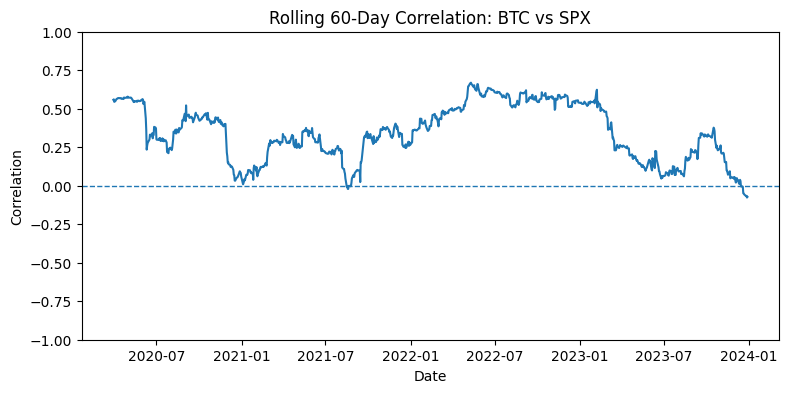

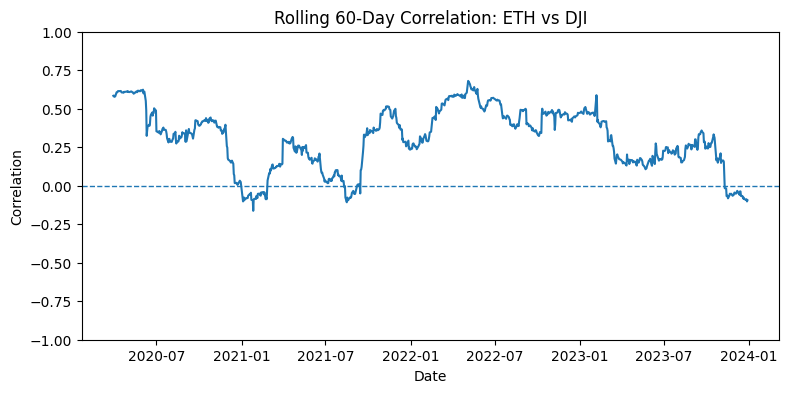

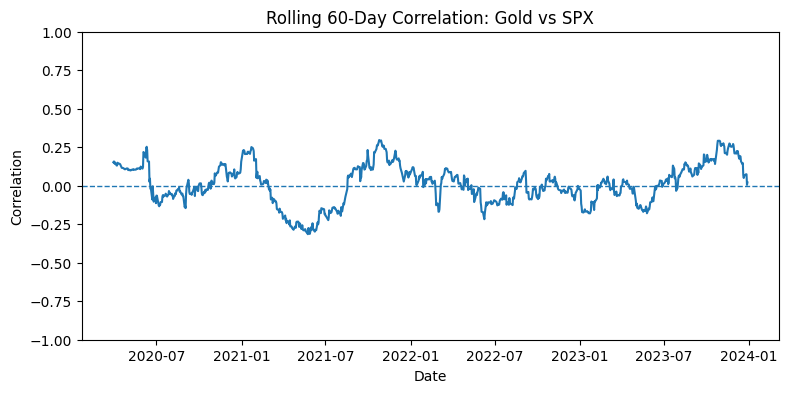

In [ ]:
WINDOW = 60
pairs = [("BTC_Close_Return","SPX_Close_Return","BTC","SPX"),
         ("ETH_Close_Return","DJI_Close_Return","ETH","DJI"),
         ("Gold_Close_Return","SPX_Close_Return","Gold","SPX")]
for xcol, ycol, xlab, ylab in pairs:
    s = ret[["Date", xcol, ycol]].dropna().copy().reset_index(drop=True)
    corr_series = s[xcol].rolling(WINDOW).corr(s[ycol])
    plt.figure(figsize=(9,4))
    plt.plot(s["Date"], corr_series)
    plt.title(f"Rolling {WINDOW}-Day Correlation: {xlab} vs {ylab}")
    plt.xlabel("Date"); plt.ylabel("Correlation")
    plt.ylim(-1, 1)
    plt.axhline(0, linestyle="--", linewidth=1)
    plt.show()
    savefig(f"{FIG}/rollingcorr_{xlab}_{ylab}.png")

## 6. Volatility Ratios

One of the clearest ways to compare risk across these markets is by looking at volatility ratios. Specifically, I looked at Bitcoin’s volatility relative to the S&P 500 and Ethereum’s volatility relative to the Dow. I also calculated rolling 30-day ratios to see how these relationships changed over time.

The full-sample numbers were striking. On average, Bitcoin’s daily volatility was about four to five times greater than the S&P’s. Ethereum’s volatility was even higher compared to the Dow, often closer to six times.

When I broke it down using rolling windows, the ratios moved around depending on the period. During calm times, like late 2020 or parts of 2023, the volatility ratios dipped a little, but they still showed crypto as several times riskier than equities. In 2021, during the bull run, the ratios surged as BTC and ETH experienced massive up-and-down swings. In 2022, the gap narrowed slightly because stocks themselves were more volatile thanks to inflation and rate hikes, but even then crypto stayed several multiples higher.

The important thing here is that the ratios never got close to one. Crypto never behaved like equities in terms of day-to-day risk. Even at their tightest, BTC and ETH were several times more volatile than the benchmarks. From a portfolio perspective, adding crypto has a much bigger impact on volatility than most other assets. Even a small amount can noticeably change the overall risk level, which could be an opportunity for higher returns but also a real challenge when it comes to managing risk.

Full-sample volatility ratio BTC/SPX: 3.01
Full-sample volatility ratio ETH/DJI: 4.05


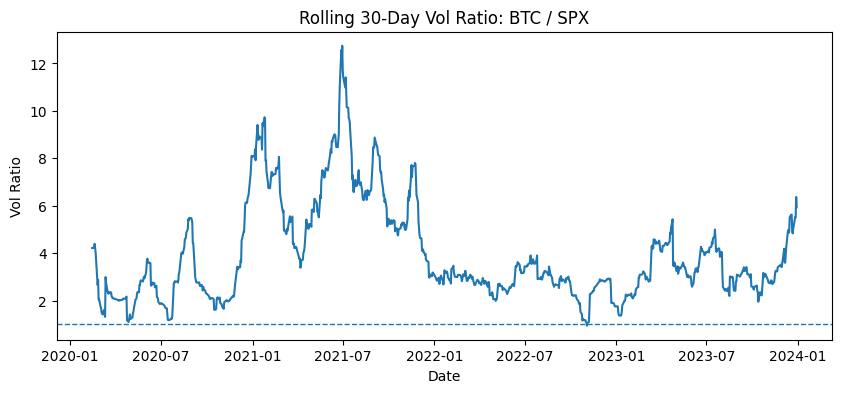

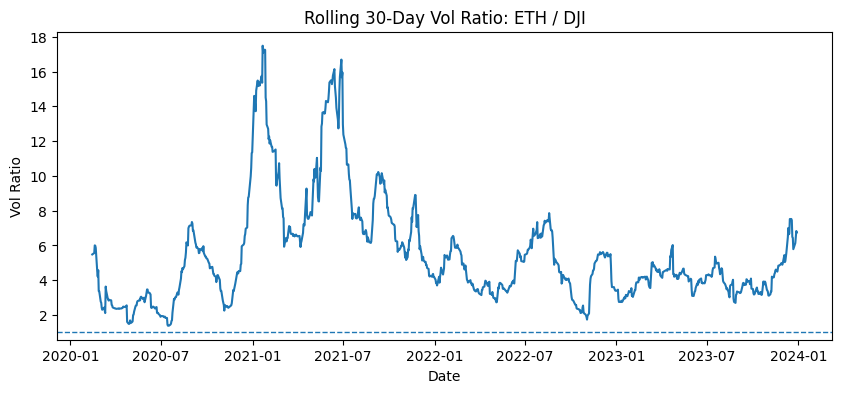

In [ ]:
btc_spx_ratio = ret["BTC_Close_Return"].std() / ret["SPX_Close_Return"].std()
eth_dji_ratio = ret["ETH_Close_Return"].std() / ret["DJI_Close_Return"].std()
print("Full-sample volatility ratio BTC/SPX:", round(btc_spx_ratio, 2))
print("Full-sample volatility ratio ETH/DJI:", round(eth_dji_ratio, 2))

ROLL = 30
r = pd.DataFrame({
    "Date": ret["Date"],
    "BTC_SPX_VolRatio": ret["BTC_Close_Return"].rolling(ROLL).std() / ret["SPX_Close_Return"].rolling(ROLL).std(),
    "ETH_DJI_VolRatio": ret["ETH_Close_Return"].rolling(ROLL).std() / ret["DJI_Close_Return"].rolling(ROLL).std(),
})
plt.figure(figsize=(10,4)); plt.plot(r["Date"], r["BTC_SPX_VolRatio"]); plt.axhline(1, linestyle="--", linewidth=1)
plt.title(f"Rolling {ROLL}-Day Vol Ratio: BTC / SPX"); plt.xlabel("Date"); plt.ylabel("Vol Ratio")
plt.show(); savefig(f"{FIG}/volratio_BTC_SPX.png")
plt.figure(figsize=(10,4)); plt.plot(r["Date"], r["ETH_DJI_VolRatio"]); plt.axhline(1, linestyle="--", linewidth=1)
plt.title(f"Rolling {ROLL}-Day Vol Ratio: ETH / DJI"); plt.xlabel("Date"); plt.ylabel("Vol Ratio")
plt.show(); savefig(f"{FIG}/volratio_ETH_DJI.png")

## 7. Implications & Next Steps

Pulling everything together, the exploratory analysis paints a pretty consistent picture. Crypto markets behave very differently from equities and gold, and those differences matter depending on what kind of investor you are.

The clearest takeaway from all of this is volatility. Bitcoin and Ethereum move a lot more than either stocks or gold, both in regular daily changes and in the big sudden spikes. That makes them high-risk but also high-reward assets. For someone chasing big gains, that volatility might look attractive, but it also comes with the real chance of taking heavy losses.

Second, the correlations show that crypto usually moves independently of stocks and gold. That suggests there could be diversification benefits. But the rolling correlation results show a catch: when markets are under stress, correlations climb. In other words, crypto starts moving with stocks during crises, which is exactly when diversification would be most valuable. Gold, on the other hand, stayed mostly uncorrelated throughout, living up to its role as a stabilizer.

Third, the period analysis and extreme day tables highlight how crypto tends to amplify whatever the broader cycle is. When markets are strong, crypto soars much higher. When conditions tighten or panic sets in, it crashes much harder. Stocks reflect the broader economy in a steadier way, while gold stays on the sidelines as a safe option.

The main takeaway here is that crypto definitely has a place in a portfolio, but it’s not simple. Even a small amount of Bitcoin or Ethereum can boost returns, but it also raises overall risk a lot. For anyone investing long term, that tradeoff isn’t something you can ignore, it has to be managed carefully.

Looking ahead, this EDA sets me up for the next part of the project, which is running more formal models. The patterns I noticed, things like volatility clustering, shifting correlations, and the fat tails in the return distributions, are exactly the kinds of features that econometric tools are designed to handle. I’ll probably start with a VAR model to check how shocks move between markets, then use Granger causality to test which markets react first, and finally apply GARCH models to get a better handle on how volatility evolves over time. The goal is to see if the trends that showed up in this exploratory work actually hold up once I test them statistically.

In general, the EDA backed up what most people already assume: crypto doesn’t act like traditional assets. That can be both good and bad. The real challenge now is to go beyond describing those differences and use proper models to understand how these markets interact, especially during times of stress.